# Perceptron Lab





In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

## 1. (40%) Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch.
- A way to create a random train/test split. Write your own. In the future you can use the scikit-learn version if you want.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. do not attempt batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no significant improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Use your perceptron to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident it is correct, run your perceptron on the Evaluation data with the same parameters, and print your final weights and accuracy.

In [31]:
'''Final Class'''
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.1, shuffle=False, deterministic=False, epoch_iter=None):
        self.lr = learning_rate
        self.shuffle = shuffle
        self.deterministic = deterministic
        self.epoch_iter = epoch_iter
        self.activation_func = self._unit_step_func



    def fit(self, X, y, initial_weights=None):
        n_samples, n_features = X.shape
        
        self.weights = self.initialize_weights(n_features) if not initial_weights else initial_weights

        #Run this unless the model is deterministic with a specified number of epochs
        if self.deterministic == False:
            
            #initialize variables for while loop - this is for the stopping criteria
            continue_loop = True
            after_iteration_accuracy = 0
            y_temporary_list = []
            self.n_iters = 0
            y_testing = np.ones(len(y), dtype=float) #added this to measure accuracy in 0th epoch

            while continue_loop:
                y_temporary_list = []
                self.model_accuracy = self.score(y, y_testing)

                print(f"model accuracy:  {self.model_accuracy}")
                print(f"classification error: {1 - self.model_accuracy}")
                print(f"difference: {self.model_accuracy - after_iteration_accuracy}")
                print(f"iteration: {self.n_iters}")
                print()

                #Don't shuffle unless shuffle == True
                if (self.shuffle == True):
                    shuffled_data = self._shuffle_data(X, y)
                    shuffled_data_df = pd.DataFrame(shuffled_data)
                    X = shuffled_data_df.iloc[:,:-1].to_numpy()
                    y = shuffled_data_df.iloc[:,-1].to_numpy()
                else:
                    X = X
                    y = y

                #Loop through dataset - 1 entire epoch
                for idx, x_i in enumerate(X):
                  
                    linear_output = np.dot(x_i, self.weights)
                    y_predicted = self.activation_func(linear_output)

                    y_temporary_list.append(y_predicted)
                    y_testing = np.array(y_temporary_list)

                    # Perceptron update rule
                    update = self.lr * (y[idx] - y_predicted)
                    self.weights += update * x_i
                
                #stopping criteria: if loss - previous loss > 0.001, then stop the iterations through dataset
                if self.model_accuracy - after_iteration_accuracy < 0.001:
                # if (1 - self.model_accuracy) - (1 - after_iteration_accuracy) > 0.001:
                    continue_loop = False

                #if not, then update variables and call methods to get values
                else:
                    after_iteration_accuracy = self.model_accuracy
                    self.get_weights()
                    self.get_ephochs()
                    self.get_model_accuracy()
                    self.n_iters += 1
        
        #Run this for debug and eval   
        else:
            print(self.epoch_iter)
            for _ in range(self.epoch_iter):
                for idx, x_i in enumerate(X):
                    linear_output = np.dot(x_i, self.weights)
                    y_predicted = self.activation_func(linear_output)
                    
                    # Perceptron update rule
                    # update = self.lr * (y[idx] - y_predicted)
                    update = .10 * (y[idx] - y_predicted)
                    self.weights += update * x_i
                  
                #call method to print weights
                print(self.weights)
                   
            
    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def initialize_weights(self, n_features):
        return np.zeros(n_features)

    def score(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    def _shuffle_data(self, X, y): 
        y_new = np.array(y, ndmin=2)
        np_shuffled = np.concatenate((X, y_new.T), axis=1)
        np.random.shuffle(np_shuffled)
        return np_shuffled

    def get_weights(self):
        return self.weights

    def get_ephochs(self):
        return self.n_iters

    def get_model_accuracy(self):
        return self.model_accuracy

    def _unit_step_func(self, x):
        return np.where(x > 0, 1, 0)


My perceptron class has all the methods that are shown in the example class, plus a few that I created (_unit_step_func(), and various getter methods). In the fit method, I check to see if the model is deterministic. If not, I go through the while loop until the stopping criteria is reached. In the loop, I also check to see whetehr or not shuffling the data was specified. If the model is not deterministic, then I run through a set number of epochs. 

## 1.1 Debug and Evaluation

Debug and Evaluate your model using the parameters below

Learning Rate = 0.1 \ 
Deterministic = 10 [This means run it 10 epochs and should be the same everytime you run it] \ 
Shuffle = False \ 
Initial Weights = All zeros

---

### 1.1.1 Debug

Debug your model by running it on the [debug dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff)

Expected Results:

Accuracy = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [21]:
# Load debug data
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output debug_data.arff

dataset = loadarff('debug_data.arff')
df_debug = pd.DataFrame(dataset[0])
df_debug = df_debug.apply(pd.to_numeric)

bias = np.ones(len(df_debug), dtype=float)
df_debug.insert(df_debug.shape[1] - 1, 'bias', bias)


X = df_debug.iloc[:,:-1].to_numpy()
y = df_debug.iloc[:,-1].to_numpy()

# Train on debug data
p = Perceptron(learning_rate=0.1, deterministic=True, epoch_iter=10)
p.fit(X, y)
predictions = p.predict(X)

# Print accuracy and weights

print("Perceptron classification accuracy", p.score(y, predictions))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0   5051      0 --:--:-- --:--:-- --:--:--  5184
10
[-4.0000000e-02 -6.9388939e-18 -1.0000000e-01]
[-0.07  0.02 -0.1 ]
[-0.1   0.04 -0.1 ]
[-0.13  0.06 -0.1 ]
[-0.16  0.08 -0.1 ]
[-0.19  0.1  -0.1 ]
[-0.2   0.12 -0.1 ]
[-0.21  0.14 -0.1 ]
[-0.22  0.16 -0.1 ]
[-0.23  0.18 -0.1 ]
Perceptron classification accuracy 0.875


### 1.1.2 Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff)

In [24]:
# Load evaluation data
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output evaluation_dataset.arff

dataset = loadarff('evaluation_dataset.arff')
df_eval = pd.DataFrame(dataset[0])
df_eval = df_eval.apply(pd.to_numeric)

bias = np.ones(len(df_eval), dtype=float)
df_eval.insert(df_eval.shape[1] - 1, 'bias', bias)

X = df_eval.iloc[:,:-1].to_numpy()
y = df_eval.iloc[:,-1].to_numpy()

# Train on evaluation data
p = Perceptron(learning_rate=0.1, deterministic=True, epoch_iter=10)
p.fit(X, y)
predictions = p.predict(X)

# Print accuracy and weights
print("Perceptron classification accuracy", p.score(y, predictions))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46685  100 46685    0     0  1085k      0 --:--:-- --:--:-- --:--:-- 1085k
10
[-0.11299355 -0.155636   -0.0781904  -0.5976357   1.6       ]
[-1.53513755 -1.11162    -0.9339804  -0.9300529   2.9       ]
[-2.07845955 -1.25625    -1.5586104  -0.7943976   2.9       ]
[-1.98766455 -1.47993    -1.6113104  -1.2714273   3.5       ]
[-2.64648442 -1.59331    -2.1070794  -1.2564265   3.8       ]
[-3.07391142 -1.7218     -2.1175274  -1.5410362   4.4       ]
[-3.55888542 -2.27593    -2.6527054  -0.6487912   3.8       ]
[-3.58077542 -2.420581   -2.5254954  -1.4587539   4.5       ]
[-3.84527942 -2.340901   -2.8255334  -1.2991006   4.7       ]
[-3.80657242 -2.840821   -3.0719334  -1.4003906   4.9       ]
Perceptron classification accuracy 0.9876093294460642


My model outputs the correct weights and accuracy for the debug data. For both the debug and evaluation datasets, I load the data into a pandas dataframe, add the bias, split the df into X and y arrays, then call the Perceptron class to fit and then predict the output.

## 2. (30%) Classifying on linearly separable and non-linearly separable data

### 2.1 Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.



In [25]:
# Create 2 datasets
import matplotlib.pyplot as plt
import numpy as np


#datset 1
dataset_1 = pd.DataFrame({'col_1': [-.5,-.2,-.2,-.5,.5,.1,.3,.2], 'col_2': [.2,.5,.3,.4,-.3,0,-.4,-.2], 'target': [1,1,1,1,0,0,0,0]})
bias = np.ones(len(dataset_1), dtype=float)
dataset_1.insert(dataset_1.shape[1] - 1, 'bias', bias)

X_1 = dataset_1.iloc[:,:-1].to_numpy()
y_1 = dataset_1.iloc[:,-1].to_numpy()


#dataset 2
dataset_2 = pd.DataFrame({'col_1': [.2,-.2,-.2,-.5,.5,-.2,.3,.2], 'col_2': [-.3,.5,.3,.4,-.3,0,-.4,-.2], 'target': [1,1,1,1,0,0,0,0]})
bias = np.ones(len(dataset_2), dtype=float)
dataset_2.insert(dataset_2.shape[1] - 1, 'bias', bias)

X_2 = dataset_2.iloc[:,:-1].to_numpy()
y_2 = dataset_2.iloc[:,-1].to_numpy()


### 2.2 Train on both sets with your perceptron code (with LR=.1)

In [32]:
# Train on each dataset

# Training on dataset 1
p = Perceptron(learning_rate=0.1, shuffle=True)

p.fit(X_1, y_1)
predictions = p.predict(X_1)
weights_1 = p.get_weights()

print(weights_1)
print("Perceptron classification accuracy of first model", p.score(y_1, predictions)) 
print()


# Training on dataset 2
p = Perceptron(learning_rate=0.1, shuffle=True)
p.fit(X_2, y_2)
predictions = p.predict(X_2)
weights_2 = p.get_weights()

print(weights_2)
print("Perceptron classification accuracy or second model", p.score(y_2, predictions)) 
print()


model accuracy:  0.5
classification error: 0.5
difference: 0.5
iteration: 0

model accuracy:  0.75
classification error: 0.25
difference: 0.25
iteration: 1

model accuracy:  1.0
classification error: 0.0
difference: 0.25
iteration: 2

model accuracy:  1.0
classification error: 0.0
difference: 0.0
iteration: 3

[-0.08  0.08  0.  ]
Perceptron classification accuracy of first model 1.0

model accuracy:  0.5
classification error: 0.5
difference: 0.5
iteration: 0

model accuracy:  0.625
classification error: 0.375
difference: 0.125
iteration: 1

model accuracy:  0.625
classification error: 0.375
difference: 0.0
iteration: 2

[-0.04  0.02 -0.1 ]
Perceptron classification accuracy 0.5



### 2.3 Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
 - For all graphs always label the axes!
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

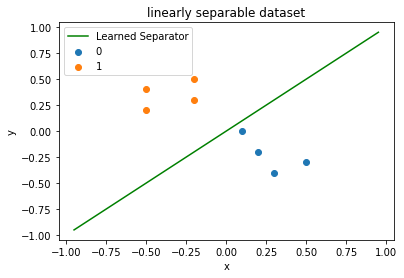

In [35]:
# Graph datasets and decision lines of Dataset 1

groups = dataset_1.groupby('target')

for name, group in groups:
  plt.scatter(group['col_1'], group['col_2'], marker="o", label=name)
plt.xlabel("x")
plt.ylabel("y")
plt.title("linearly separable dataset")
'''pseudo code'''
plt.plot([-.95, .95], [-.95 * (-weights_1[0]/weights_1[1]) + (-weights_1[2]/weights_1[1]), 
                       .95 * (-weights_1[0]/weights_1[1]) + (-weights_1[2]/weights_1[1])], c='g', label="Learned Separator")
plt.legend()
plt.show()


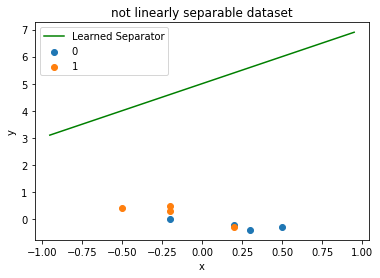

In [36]:
# Graph datasets and decision lines of Dataset 2

groups = dataset_2.groupby('target')

for name, group in groups:
  plt.scatter(group['col_1'], group['col_2'], marker="o", label=name)
plt.xlabel("x")
plt.ylabel("y")
plt.title("not linearly separable dataset")
'''pseudo code'''
plt.plot([-.95, .95], [-.95 * (-weights_2[0]/weights_2[1]) + (-weights_2[2]/weights_2[1]), 
                       .95 * (-weights_2[0]/weights_2[1]) + (-weights_2[2]/weights_2[1])], c='g', label="Learned Separator")
plt.legend()
plt.show()

### 2.4 Discuss why the perceptron won’t converge on non-linearly separable 


The perceptron is a linear model so it will never learn a line that perfectly separates non-linear data. If the dataset is not linearly separable, then as the perceptron model runs through each feature in a given epoch, it will eventually reach a misclassified point and update the weights. Thus, the model will never reach 100% accuracy. If all the points in the dataset can be separated by a hyperplane, then the perceptron is guaranteed to converge on some solution (although the solution is not guaranteed to be optimal). Since a perceptron algorithm will continue to loop forever if the points are not linearly separable (which is most likely to be the case), we put stopping criteria to get the best model (with the highest accuracy) we can with the given dataset.

In the first dataset the perceptron converged after 2 epochs, reaching 100% accuracy. The perceptron was not able to linearly separate second dataset and its accuracy decreased after the first epoch. (My stopping criteria caused this to end the iterations through the model, thus the line is inaccurate)

## 3. (20%) Use your perceptron code to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the 5 trials and the average across the 5 trials in a table.  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .95 | .55 | 4 |
| 2 | .85 | .45 | 6 |
| Average | .9 | .5 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [37]:
# Create the table any way you like
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff --output voting_dataset.arff

# Loading data
dataset = loadarff('voting_dataset.arff')
df_voting = pd.DataFrame(dataset[0])

# Cleaning data and converting to proper data type
str_df = df_voting.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()

for col in str_df:
    df_voting[col] = str_df[col]

df_voting = df_voting.replace('n', 0)
df_voting = df_voting.replace('y', 1)
df_voting = df_voting.replace('democrat', 1)
df_voting = df_voting.replace('republican', 0)

# doing this for 5 trials
num_loops = 5
trial = 1
df_table_results = pd.DataFrame(columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs'])
misclassification_rate = []

for i in range(1, num_loops + 1):
      # Loading training dataset and splitting into 70/30
      length_train = round(len(df_voting) * .7)
      train_df = df_voting[:length_train]
      bias = np.ones(len(train_df), dtype=float)
      train_df.insert(train_df.shape[1] - 1, 'bias', bias)

      # putting train_df into x and y for the fit
      X_train = train_df.iloc[:,:-1].to_numpy()
      y_train = train_df.iloc[:,-1].to_numpy()


      # Loading test dataset and splitting into 70/30
      length_test = round(len(df_voting) * .3)
      test_df = df_voting.tail(length_test)
      bias_test = np.ones(len(test_df), dtype=float)
      test_df.insert(test_df.shape[1] - 1, 'bias', bias_test) 

      # print the triall
      print(f"********** Trial: {i} ************")
      print()

      # throw into model and get results
      p = Perceptron(learning_rate=0.1, shuffle=True)
      p.fit(X_train, y_train)
      predictions = p.predict(X_train)
      a = p.get_weights()
      print(f"Weights after training: {a}")
      print()

      # test the test_df
      X_test = test_df.iloc[:,:-1].to_numpy()
      y_test = test_df.iloc[:,-1].to_numpy()
      predictions = p.predict(X_test)
      print("Perceptron classification accuracy on test", i, " ", p.score(y_test, predictions))
      print()
 
      # Loading results into dataframe 
      training_accuracy = p.get_model_accuracy()
      test_accuracy = p.score(y_test, p.predict(X_test))
      epochs = p.get_ephochs()

      df_table_results.loc[len(df_table_results.index)] = [trial, training_accuracy, test_accuracy, epochs]
      
      # updatgint counts
      trial += 1
      i += 1

df_table_results = df_table_results.astype({"Trial": int})
df_table_results = df_table_results.set_index('Trial')
df_table_results.loc['Average'] = df_table_results.mean()
df_table_results

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43825  100 43825    0     0   202k      0 --:--:-- --:--:-- --:--:--  202k
********** Trial: 1 ************

model accuracy:  0.6037151702786377
classification error: 0.39628482972136225
difference: 0.6037151702786377
iteration: 0

model accuracy:  0.8947368421052632
classification error: 0.10526315789473684
difference: 0.2910216718266254
iteration: 1

model accuracy:  0.9287925696594427
classification error: 0.07120743034055732
difference: 0.034055727554179516
iteration: 2

model accuracy:  0.9411764705882353
classification error: 0.05882352941176472
difference: 0.012383900928792602
iteration: 3

model accuracy:  0.9195046439628483
classification error: 0.08049535603715174
difference: -0.021671826625387025
iteration: 4

Weights after training: [ 2.00000000e-01  2.00000000e-01  5.00000000e-01 -1.50000000e+00
 -4.00000000e-01  

,Training Accuracy,Test Accuracy,Number of Epochs
Trial,,,
1,0.919505,0.956522,4.0
2,0.953560,0.884058,6.0
3,0.941176,0.920290,4.0
4,0.941176,0.905797,4.0
5,0.950464,0.905797,4.0
Average,0.941176,0.914493,4.4


### 3.2 By looking at the weights, explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


The model has learned how the 16 features in the dataset affect output of the datset. In this case, the output is the party of a given congressperson. Weights affect the amount of influence a change in the input will have upon the output. In this dataset, inputs with higher absolute weights contribute more towards a congressperson’s political affiliation, and those inputs with smaller absolute weights matter less, or have a smaller influence on the output. 

The three most critical features are “physician-fee-freeze”, “adoption-of-the-budget-resolution” and “mx-missile.” These three features consistently had the largest absolute values over the 5 trials.  The two least critical features (the features with the smallest absolute value over the 5 trials)  were “crime” and “water-project-cost-sharing.” 

(Note: After a quick google search of these bills and a brief overview of the political climate in the 80's, these results seem fairly intuitive)

### 3.3 Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs).


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

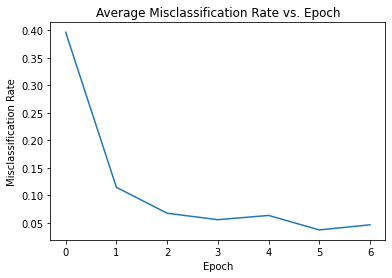

In [68]:
# Graph here
    
def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

#Loading csv that I am attaching to this lab
avg_misclassification_rate = pd.read_csv("/content/sample_data/Results_Voting_Data_Error.csv")
avg_misclassification_rate.loc['Average'] = avg_misclassification_rate.mean()

avg_misclassification_rate = avg_misclassification_rate.loc[5].values.tolist()
avg_misclassification_rate.pop(0)

plot_misclassification(avg_misclassification_rate)

  
    


The misclassification rate starts to oscillate after around 3 epochs. It hovers around 5% before my stopping criteria stops the algorithm from continuing to iterate through the epochs

## 4.1 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above.
- Report and compare your results with your own perceptron code.

In [71]:
# Load sklearn perceptron
from sklearn.model_selection import train_test_split
import random as r
import sklearn
from sklearn.linear_model import Perceptron

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff --output voting_dataset.arff

# Loading data
dataset = loadarff('voting_dataset.arff')
df_voting = pd.DataFrame(dataset[0])

# Cleaning data and converting to proper data type
str_df = df_voting.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()

for col in str_df:
    df_voting[col] = str_df[col]

df_voting = df_voting.replace('n', 0)
df_voting = df_voting.replace('y', 1)
df_voting = df_voting.replace('democrat', 1)
df_voting = df_voting.replace('republican', 0)


# Train on voting dataset

# Running data through algorithm - with training and testing
X_data = df_voting.iloc[:,:-1].to_numpy()
y_data = df_voting.iloc[:,-1].to_numpy()

# Replicating the trails in my algorithm in previous section
num_tests = 5

for i in range(1, num_tests + 1):
      
    rand_int = r.randint(1, 100)

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30, random_state = rand_int)

    #Same stopping criteria - iterations will stop when (loss > previous_loss - tol) ... and tol is .001
    p_model_voting = Perceptron(tol=1e-3, random_state=0)
    p_model_voting.fit(X_train, y_train)
    accuracy = p_model_voting.score(X_test, y_test)

    print(f"Trial {i} results in accuracy of {accuracy}")
    print()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43825  100 43825    0     0   995k      0 --:--:-- --:--:-- --:--:--  995k
Trial 1 results in accuracy of 0.9568345323741008

Trial 2 results in accuracy of 0.9496402877697842

Trial 3 results in accuracy of 0.935251798561151

Trial 4 results in accuracy of 0.9496402877697842

Trial 5 results in accuracy of 0.935251798561151



Using the perceptron algorithm from the scikit-learn toolkit to learn the voting set data yielded very similar testing accuracy over the 5 trials compared to my model. I set the stopping criteria of the scikit-learn model to “tol=le-3”, which means to stop the model when “loss > previous_loss - tol.” This was the same stopping criteria that I had in my code in the fit() method. (if self.model_accuracy - after_iteration_accuracy < 0.001:)

After 5 trials, my algorithm was 1.4% more accurate, on average (my model had 92.9% accuracy, compared with 91.5% for the scikit-learn model). The other default parameters from the scikit-learning-toolkit are likely causing the small variation from my code.


## 4.2 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn one other data set of your choice.
- Try out some of the hyper-parameters that scikit-learn makes available.

In [78]:
# Load sklearn perceptron
!curl https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff --output telescope.arff


telescope_data = loadarff("telescope.arff")
telescope_df = pd.DataFrame(telescope_data[0])

#Cleaning data
str_df_new = telescope_df.select_dtypes([np.object])
str_df_new = str_df_new.stack().str.decode('utf-8').unstack()

for col in str_df_new:
    telescope_df[col] = str_df_new[col]

#gamma = 0 ; hadron = 1
telescope_df = telescope_df.replace('g', 0)
telescope_df = telescope_df.replace('h', 1)

#normalizing data
X_data = telescope_df.iloc[:,:-1]
normalized_X_data =(X_data-X_data.min())/(X_data.max()-X_data.min())



# Train on your dataset
from sklearn.model_selection import train_test_split
import random as r

# Running data through algorithm - with training and testing
X_telescope = normalized_X_data.to_numpy()
y_telescope = telescope_df.iloc[:,-1].to_numpy()

# Implementing same trial format - iterating through 5 times
num_tests = 5

for i in range(1, num_tests + 1):
      
    rand_int = r.randint(1, 100)

    X_train, X_test, y_train, y_test = train_test_split(X_telescope, y_telescope, test_size=0.30, random_state = rand_int)

    p_model_telescope = Perceptron(penalty='l2', early_stopping=True, random_state=0)
    p_model_telescope.fit(X_train, y_train)
    accuracy = p_model_telescope.score(X_test, y_test)

    print(f"Trial {i} results in accuracy of {accuracy}")
    print()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1448k  100 1448k    0     0   774k      0  0:00:01  0:00:01 --:--:--  774k
Trial 1 results in accuracy of 0.7145110410094637

Trial 2 results in accuracy of 0.7590255871012969

Trial 3 results in accuracy of 0.7676130389064143

Trial 4 results in accuracy of 0.7917981072555205

Trial 5 results in accuracy of 0.7953031896249562



I chose to use the “Magic gamma telescope” dataset. This dataset has 10 continuous features with one output class (gamma or hadron). I converted the output class to binary outputs and I normalized all the continuous features using min/max normalization. I ran 5 trials through the dataset, randomizing and splitting the data using the train_test_split method from sklearn. 

In the perceptron algorithm I used the penalty, early_stopping, and the other default hyper-parameters. I set the penalty to “l2” regularization. The L2 regularization performed much better on average in my 5 trial runs than the L1 penalty (around %5 less error). I believe that L2 performed better because the L2 estimates the mean rather than the median, which helps to avoid overfitting. The early_stopping parameter automatically sets aside a fraction of training data as validation and terminates training when the validation score is not improved by at least tol. This combination of parameters gave me the best score for this perceptron model. Over the 5 trial runs, I got an average accuracy of 76.6%.


## 5. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) or some other task with more than two possible output values. 

Note that the [iris data](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement either of the two most common ways to deal with this. For testing you just execute the novel instance on each model and combine the overall results to see which output class wins.